In [2]:
def init(W,V,n):
    for l in range (-1 ,4):
        for i in range(0, n-l):
            W[i][i+l] = 0
            V[i][i+l] = -float('infinity')
    return (W,V)

In [3]:
comp = [('A','U'),('U','A'),('G','C'),('C','G'),('U','G')]
def forward(W, V, seq, n):
    for l in range(4, n):
        for i in range(0,n-l):
            if (seq[i],seq[i+l]) in comp:
                V[i][i+l] = max(W[i+1][i+l-1], 1+V[i+1][i+l-1])
            else :
                V[i][i+l] = -float('infinity')
            W[i][i+l] = W[i+1][i+l]
            tmpMax = 0
            for k in range(i+4, i+l+1):
                tmpMax = max(tmpMax, V[i][k]+W[k+1][i+l])
            tmpMax  = max(tmpMax, V[i][i+l])
            W[i][i+l] = max(W[i+1][i+l], tmpMax)
    return (W, V)

In [4]:
def traceVpath(i, j, W, V):
    if V[i][j]==W[i+1][j-1]:
        traceWpath(i+1, j-1, W, V)
    elif V[i][j]==1+V[i+1][j-1]:
        traceVpath(i+1, j-1, W, V)
    if i not in structure and j not in structure:
        structure[i] = j
        structure[j] = i

In [5]:
def traceWpath(i, j, W, V):
    if i < j and W[i][j] == W[i+1][j]:
        traceWpath(i+1, j, W, V)
    else:
        if i < j:
            for k in range(i+3, j+1):
                if W[i][j] == V[i][k] + W[k+1][j]:
                    traceWpath(k+1, j, W, V)
                    traceVpath(i, k, W, V)
                    break

In [9]:
def CustomFold(seq):
    n = len(seq)
    global structure
    structure = [None for i in range(0, n)]
    W = [[None for c in range(1,n+3)] for d in range(1,n+3)]
    V = [[None for c in range(1,n+3)] for d in range(1,n+3)]
    initW,initV = init(W, V, )
    filledW,filledV = forward(initW,initV,seq,n)
    traceWpath(0,n-1,filledW,filledV)
    annot = ''.join(['.' if j is None else ')' if j < i else '(' for i, j in enumerate(structure)])
    return annot

In [10]:
seq = "GCCAGGGUGGCAGAGGGGCUUUGCGGCGGACUUCAGAUCCGCUUUACCCCGGUUCGAAUCCGGGCCCUGGC"
print(CustomFold(seq))

TypeError: init() missing 1 required positional argument: 'n'

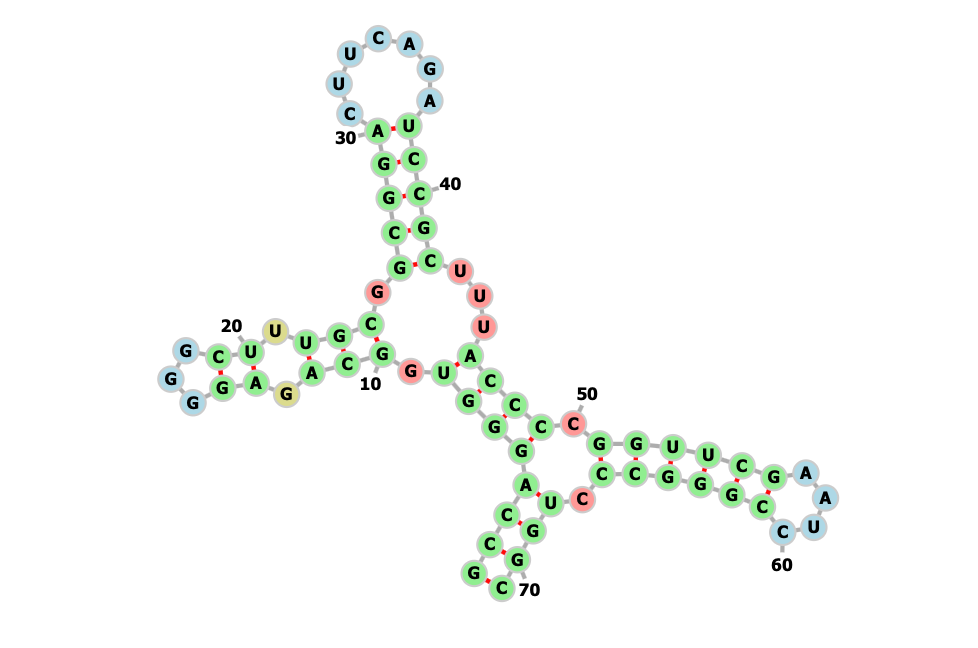